In [1]:
%matplotlib notebook

from gamesopt.train import train, TrainConfig
from gamesopt.games import load_game, GameOptions, QuadraticGameConfig, GameType
from gamesopt.games.quadratic_games import make_random_matrix
from gamesopt.optimizer import load_optimizer, OptimizerOptions, OptimizerType
from gamesopt.optimizer.prox import ProxOptions, ProxType
import torch
from collections import defaultdict
import matplotlib.pyplot as plt
from gamesopt.db import Database
from pathlib import Path

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]
})

width = 487.8225
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

def plot_record(record_id, *args, **kwargs):
    record = db.getRecord(record_id)
    plt.plot(record.metrics.num_grad, record.metrics.dist2opt, *args, **kwargs)

In [331]:
torch.manual_seed(1234)
options = QuadraticGameConfig(num_samples = 100, dim = 20)
m_0 = make_random_matrix(options.num_samples-50, options.num_players*options.dim, ell=1)
m_1 = make_random_matrix(50, options.num_players*options.dim, ell=10000)
options.matrix = torch.cat([m_0, m_1])

In [139]:
eigs = torch.linalg.eigvals(matrix)

NameError: name 'matrix' is not defined

In [4]:
print(eigs)

tensor([[9.0317e-02+0.0000e+00j, 2.9120e-01+0.0000e+00j, 9.3312e-01+0.0000e+00j,
         1.0000e+00+0.0000e+00j],
        [1.0000e+00+0.0000e+00j, 1.4751e-01+3.4209e-01j, 1.4751e-01-3.4209e-01j,
         2.9862e-01+0.0000e+00j],
        [3.4136e-01+4.7417e-01j, 3.4136e-01-4.7417e-01j, 3.2143e-01+0.0000e+00j,
         5.7288e-01+0.0000e+00j],
        [9.1425e-02+2.8821e-01j, 9.1425e-02-2.8821e-01j, 1.1520e-01+0.0000e+00j,
         4.6054e-01+0.0000e+00j],
        [2.3563e-02+1.5168e-01j, 2.3563e-02-1.5168e-01j, 1.0864e-02+0.0000e+00j,
         1.5705e-01+0.0000e+00j],
        [1.4147e+02+5.7098e+01j, 1.4147e+02-5.7098e+01j, 1.2320e+00+3.5078e+01j,
         1.2320e+00-3.5078e+01j],
        [1.2043e+02+0.0000e+00j, 7.5623e+02+0.0000e+00j, 8.9077e+02+0.0000e+00j,
         1.0000e+03+0.0000e+00j],
        [9.5674e+02+2.0344e+02j, 9.5674e+02-2.0344e+02j, 2.4275e+02+0.0000e+00j,
         4.1543e+02+0.0000e+00j],
        [1.0000e+03+0.0000e+00j, 3.8398e+01+0.0000e+00j, 3.8210e+02+0.0000e+00j,

In [4]:
db = Database(Path("./results"))

# Quadratic (NoProx)

In [244]:
def create_config(optimizer: OptimizerOptions = OptimizerOptions(), importance_sampling: bool = False):
    options.importance_sampling = importance_sampling 
    torch.manual_seed(1234)
    options.matrix = matrix
    game = GameOptions(game_type = GameType.QUADRATIC, quadratic_options=options)
    config = TrainConfig(game = game, optimizer=optimizer, num_iter = 500)
    return config

In [245]:
exp = db.createExp("US vs IS")

NameError: name 'db' is not defined

In [182]:
config = create_config(OptimizerOptions(optimizer_type = OptimizerType.PROX_SGDA, lr=1e-3),
                       importance_sampling = False)
record_us = train(config)

Init...


In [183]:
config = create_config(OptimizerOptions(optimizer_type = OptimizerType.PROX_SGDA, lr=2e-3),
                       importance_sampling = True)
record_is = train(config)

Init...
tensor([1.9998e-06, 1.9996e-06, 1.9997e-06, 1.9998e-06, 1.9990e-06, 2.0000e-06,
        1.9997e-06, 1.9992e-06, 1.9997e-06, 1.9997e-06, 2.0000e-06, 2.0001e-06,
        1.9994e-06, 1.9995e-06, 1.9998e-06, 1.9997e-06, 2.0019e-06, 1.9998e-06,
        2.0008e-06, 1.9997e-06, 1.9998e-06, 2.0145e-06, 1.9995e-06, 1.9998e-06,
        2.0010e-06, 1.9996e-06, 1.9998e-06, 2.0012e-06, 1.9967e-06, 1.9998e-06,
        2.0002e-06, 1.9996e-06, 2.0001e-06, 1.9997e-06, 1.9995e-06, 1.9999e-06,
        1.9996e-06, 1.9997e-06, 1.9997e-06, 2.0011e-06, 1.9994e-06, 1.9997e-06,
        1.9998e-06, 1.9997e-06, 1.9998e-06, 1.9996e-06, 1.9998e-06, 1.9997e-06,
        1.9997e-06, 1.9999e-06, 1.9997e-02, 1.9994e-02, 1.9998e-02, 1.9997e-02,
        1.9998e-02, 1.9997e-02, 1.9997e-02, 1.9997e-02, 1.9997e-02, 1.9998e-02,
        1.9997e-02, 2.0005e-02, 1.9997e-02, 1.9999e-02, 1.9996e-02, 1.9996e-02,
        1.9998e-02, 1.9997e-02, 1.9998e-02, 1.9996e-02, 1.9997e-02, 2.0013e-02,
        1.9990e-02, 1.9997e-02, 

<IPython.core.display.Javascript object>


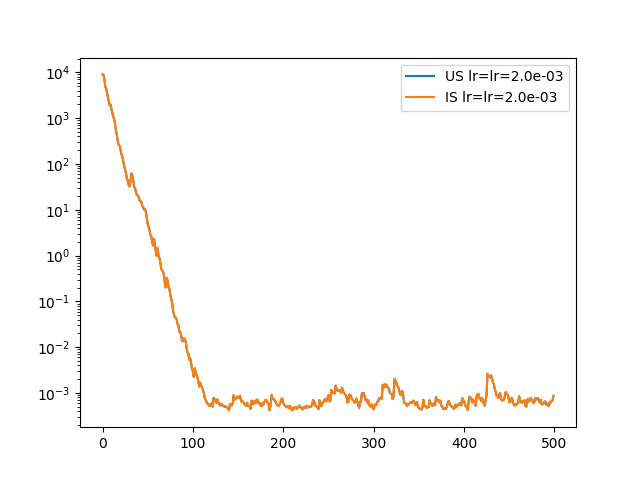

In [184]:
plt.figure()
plt.yscale("log")
plt.plot(record_us.metrics.num_grad, record_us.metrics.hamiltonian, label="US lr=%s"%str(config.optimizer.lr))
plt.plot(record_is.metrics.num_grad, record_is.metrics.hamiltonian, label="IS lr=%s"%str(config.optimizer.lr))
plt.legend()

# Quadratic with Prox

In [346]:
PATH = Path("./results/quadratic_prox")
options.importance_sampling = False
game_conf = GameOptions(game_type = GameType.QUADRATIC, quadratic_options=options)
prox = ProxOptions(prox_type=ProxType.LINF_BALL_L1_REG, ball_radius = 1e-1, l1_reg = 1e-1)
optimizer = OptimizerOptions(optimizer_type = OptimizerType.PROX_SGDA, lr=2e-3, full_batch=True)
config = TrainConfig(game = game_conf, prox=prox, optimizer=optimizer, num_iter = 100, save_file=PATH)

In [347]:
record = train(config)
game = load_game(config.game)
game.load(PATH)
print(game.players)

Init...
[tensor([-0.0007,  0.0091,  0.0040,  0.0008,  0.0054,  0.0018, -0.0035,  0.0058,
         0.0016, -0.0026, -0.0085, -0.0029,  0.0062, -0.0002,  0.0033,  0.0066,
         0.0053, -0.0045,  0.0051,  0.0035], requires_grad=True), tensor([-1.1055e-03, -1.8503e-04, -1.4588e-03,  4.4862e-03, -9.1012e-04,
         2.6653e-03, -8.7973e-05, -1.4937e-02, -2.2471e-03,  1.3123e-04,
         5.2157e-03,  8.1529e-03, -7.2691e-05,  9.6571e-05,  5.2125e-04,
        -4.8683e-04,  1.1283e-03, -2.1986e-03, -3.8661e-03,  3.2155e-04],
       requires_grad=True)]


<IPython.core.display.Javascript object>


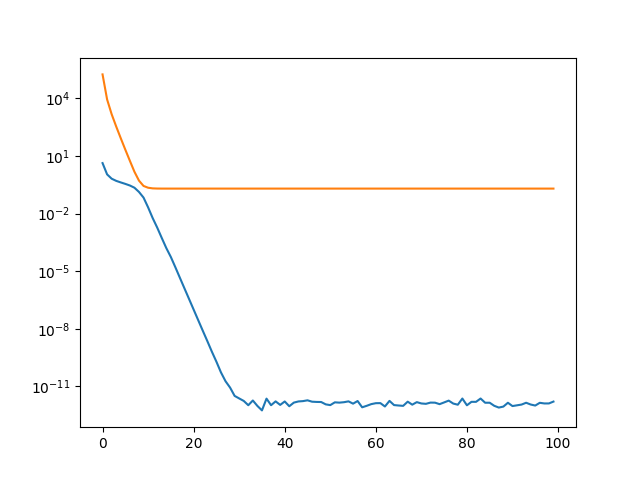

In [348]:
plt.figure()
plt.plot(record.metrics.prox_dist)
plt.plot(record.metrics.hamiltonian)
plt.yscale("log")

<IPython.core.display.Javascript object>


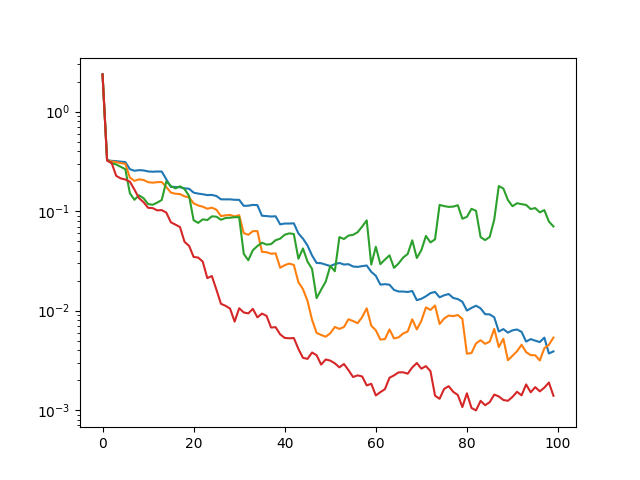

In [349]:
plt.figure()
plt.yscale("log")

In [358]:
exp = db.createExp("US vs IS")

Experiment: 7f486f68-54e6-4ff3-8a06-30a9471d0750


In [360]:
optimizer = OptimizerOptions(optimizer_type = OptimizerType.PROX_SGDA, lr=2e-4)
config = TrainConfig(game = game_conf, prox=prox, optimizer=optimizer, num_iter = 1000, load_file=PATH)
config.game.quadratic_options.importance_sampling = False
record = exp.create_record()
train(config, record)

Record: e38b9c26-2d20-4532-a13e-60de4b84f9e4
Init...


In [383]:
optimizer = OptimizerOptions(optimizer_type = OptimizerType.PROX_SGDA, lr=2e-4)
config = TrainConfig(game = game_conf, prox=prox, optimizer=optimizer, num_iter = 1000, load_file=PATH)
config.game.quadratic_options.importance_sampling = True
record = exp.create_record()
train(config, record)

Record: f6b3c917-9906-4427-a3c5-645bcba959c5
Init...
tensor([1.9998e-06, 1.9998e-06, 1.9998e-06, 1.9998e-06, 2.0000e-06, 1.9998e-06,
        1.9998e-06, 1.9998e-06, 1.9998e-06, 1.9999e-06, 1.9998e-06, 1.9998e-06,
        1.9998e-06, 2.0000e-06, 1.9996e-06, 1.9998e-06, 1.9999e-06, 1.9998e-06,
        1.9998e-06, 1.9998e-06, 1.9998e-06, 1.9999e-06, 1.9998e-06, 1.9998e-06,
        1.9998e-06, 1.9999e-06, 1.9999e-06, 1.9998e-06, 1.9999e-06, 1.9998e-06,
        1.9998e-06, 1.9998e-06, 1.9998e-06, 1.9998e-06, 1.9998e-06, 1.9999e-06,
        1.9998e-06, 1.9998e-06, 1.9998e-06, 1.9999e-06, 1.9999e-06, 2.0002e-06,
        1.9999e-06, 1.9999e-06, 1.9998e-06, 1.9999e-06, 1.9998e-06, 1.9998e-06,
        1.9998e-06, 1.9997e-06, 1.9998e-02, 1.9999e-02, 1.9996e-02, 1.9998e-02,
        1.9999e-02, 1.9998e-02, 1.9998e-02, 1.9985e-02, 1.9999e-02, 1.9999e-02,
        1.9998e-02, 1.9998e-02, 1.9998e-02, 1.9999e-02, 1.9998e-02, 1.9998e-02,
        1.9995e-02, 1.9998e-02, 1.9998e-02, 1.9998e-02, 1.9999e-02,

<IPython.core.display.Javascript object>


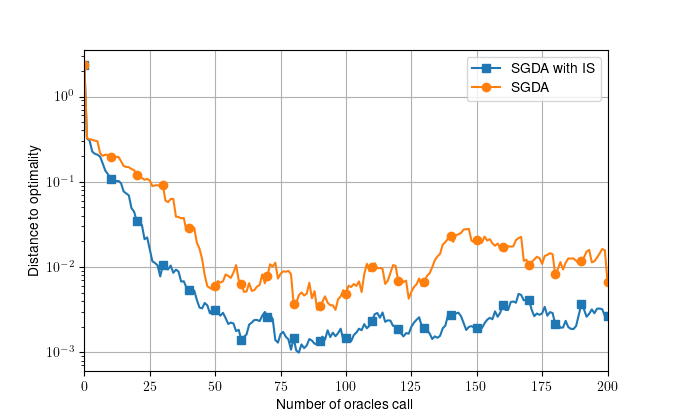

In [7]:
plt.figure(figsize=set_size(width))
plot_record("f6b3c917-9906-4427-a3c5-645bcba959c5", label="SGDA with IS", marker="s", markevery=10)
plot_record("e38b9c26-2d20-4532-a13e-60de4b84f9e4", label="SGDA", marker="o", markevery=10)
plt.yscale("log")
plt.xlim(0, 200)
plt.xlabel("Number of oracles call")
plt.ylabel("Distance to optimality")
plt.grid()
plt.legend()
plt.savefig('figures/quadratic_prox_us_vs_is.pdf', bbox_inches='tight')